<h4 class='prehead'>SM286D &middot; Introduction to Applied Mathematics with Python &middot; Spring 2020 &middot; Uhan</h4>

<h1 class='lesson_title'>Exam 2 &mdash; 7 April 2020 &mdash; Part II (Open-Book)</h1>

## Instructions

This exam has 2 parts: Part I and Part II (this part). You should have submitted Part I before starting this part.

You have 2 hours to complete both parts of this exam. __This exam is due on Thursday 9 April at 23:59 (your local time zone).__

For this part of the exam, you may use your own course materials (e.g. notes, textbook), as well as any materials directly linked from the [class website](https://www.usna.edu/Users/math/uhan/sm286d/). __No collaboration allowed.__

There are 5 problems in this part, worth a total of 70 points. The exam (both parts) is worth a total of 100 points.

Save your work frequently! When you are finished, submit this file using the SM286D Assignment Submission Form linked on the [class website](https://www.usna.edu/Users/math/uhan/sm286d/).

---

## Your signature required here

By typing your name in the box below, you pledge on your honor that you have used only the allotted time, that you have not used any unauthorized materials, and that you have not given or received any unauthorized assistance.

<span style="color:red"><strong>WRITE YOUR NAME IN THIS BOX. DOUBLE-CLICK TO EDIT.</strong></span>

---

## Problem 1 (15 points)

In the same folder as this notebook, there is an Excel file `XFL.xlsx` that contains data for the top 12 rushers in the XFL through Week 5 of the 2020 season on a sheet named **Sheet1**.  

<!--Download this file and put it in a folder on your computer called C:\Output.-->

The columns in **Sheet1** contain the following information:

| Column heading | Column contents |
|:---------------|:----------------|
| Player         | Player Name |
| Position       | Abbreviation for that player's position |
| Team           | Abbreviation for that player's team |
| Attempts       | Total number of rushing attempts for that player |
| Yards          | Total yards gained by that player |

__(a) 6 points.__ Replace **only** the `...` in the code below to import the data necessary to answer all parts of this problem

In [ ]:
import xlwings as xw

# Load data workbook
wb = xw.Book('XFL.xlsx')

# Create a variable pointing to the sheet that contains the data
s_data = wb.sheets[...]

# Specify the total number of players
num_players = 12

# Create a dictionary to store the player data
player_data = {}      
for i in range(...):
    player = s_data.range(...).value
    position = s_data.range(...).value
    team = s_data.range(...).value
    attempts = s_data.range(...).value
    yards = s_data.range(...).value
    player_data[player] = {'Position':player, 'Position':position, 'Team':team, 'Attempts':attempts, 'Yards':yards}

In [1]:
# SOLUTION
import xlwings as xw

# Load data workbook
wb = xw.Book('XFL.xlsx')

# Create a variable pointing to the sheet that contains the data
s_data = wb.sheets['Sheet1']

# Specify the total number of players
num_players = 12

# Create a dictionary to store the player data
player_data = {}      
for i in range(1, num_players + 1):
    player = s_data.range(f'A{i + 1}').value
    position = s_data.range(f'B{i + 1}').value
    team = s_data.range(f'C{i + 1}').value
    attempts = s_data.range(f'D{i + 1}').value
    yards = s_data.range(f'E{i + 1}').value
    player_data[player] = {'Position':player, 'Position':position, 'Team':team, 'Attempts':attempts, 'Yards':yards}

__(b) 3 points.__
Using Python, compute the Yards Per Attempt (YPA) for each player. YPA is given by

\begin{equation*}
    \rm{YPA} = \frac{\rm{Yards}}{\rm{Attempts}},
\end{equation*}

where $\text{Yards}$ is the total number of yards gained by that player and $\text{Attempts}$ is the total number of rushing attempts for that player.  Use a `for` loop and the `.items()` dictionary method to consider players one at a time.  For each player, add a key-value pair to his dictionary to store his YPA value.

In [2]:
# SOLUTION
# Compute the YPA for each player and add to dictionary
for player, player_dict in player_data.items():
    ypa = player_dict['Yards'] / player_dict['Attempts']
    player_dict['YPA'] = ypa

__(c) 3 points.__
Using a `for` loop and the `.items()` dictionary method, identify the player that has the highest YPA and this highest value.
Print this information using an f-string. Use 3 decimal places of accuracy to display this highest YPA.

Similarly, using a `for` loop and the `.items()` dictionary method, identify the player with the lowest YPA and this lowest value.  Print this information using an f-string. Use 3 decimal places of accuracy to display this lowest YPA.

In [3]:
# SOLUTION
# Initialize variables for highest YPA and corresponding player
max_ypa = -float('inf')
max_ypa_player = "" 

# Identify highest YPA and corresponding player
for player, player_dict in player_data.items():
    if max_ypa < player_dict['YPA']:
        max_ypa = player_dict['YPA']
        max_ypa_player = player

print(f"{max_ypa_player} has the highest YPA, {max_ypa:.3f}.")

# Initialize variables for lowest YPA and corresponding player
min_ypa = float('inf')
min_ypa_player = "" 

# Identify lowest YPA and corresponding player
for player, player_dict in player_data.items():
    if min_ypa > player_dict['YPA']:
        min_ypa = player_dict['YPA']
        min_ypa_player = player

print(f"{min_ypa_player} has the lowest YPA, {min_ypa:.3f}.")

Jordan Ta'amu has the highest YPA, 5.293.
Christine Michael has the lowest YPA, 3.017.


__(d) 3 points.__
Use appropriate `for` loop(s) to write the correct YPA for each player back to the Excel file.  Your answers should be written to the sheet labeled **Sheet1**.  The column heading **YPA** should go in cell F1. The appropriate YPA values should be in column F starting with cell F2.  

To receive full credit for this problem, you **must** write the YPA values back to the appropriate locations using a **`for` loop**.

In [4]:
# SOLUTION
# Set the location for the output data in the Excel spreadsheet
s_output = wb.sheets['Sheet1']

# Write the column header to the worksheet in Excel
s_output.range('F1').value = 'YPA'

# Output player names and YPA values to worksheet in Excel

# This is "good enough" to get the job done, but doesn't really check to see if the 
# player name in column A matches the YPA information going in column F
i = 1
for player_dict in player_data.values():
    s_output.range(f'F{i+1}').value = player_dict['YPA']
    i += 1

# This is a "better" way to write the information back to the spreadsheet in the
# sense that it uses the player name in column A to find the appropriate value
# of YPA to write to column F (or in this case column G so I didn't write over 
# the other values)
s_output.range('G1').value = 'YPA'

for i in range(1, num_players+1):
    my_player = s_output.range(f'A{i+1}').value
    s_output.range(f'G{i+1}').value = player_data[my_player]['YPA']

## Problem 2 (10 points)

Use the graph below to answer this question.

<img src="img/graph_question_4.png" alt="Drawing" style="width: 400px;"/>

__(a) 3 points.__
Define the adjacency matrix for the given graph.

In [5]:
# SOLUTION
import numpy as np

# Define adjacency matrix
A = np.zeros([7, 7])
A[0, [1, 2]] = 1
A[1, [0, 2]] = 1
A[2, [0, 1, 3, 4, 5]] = 1
A[3, [2, 5, 6]] = 1
A[4, [2, 5, 6]] = 1
A[5, [2, 3, 4, 6]] = 1
A[6, [3, 4, 5]] = 1

__(b) 1 point.__ Import the `networkx` package and define the graph `G` using your `A` matrix from Part A.

In [6]:
# SOLUTION
import networkx as nx
G = nx.Graph(A)

__(c) 1 point.__ Draw the graph `G` using the `networkx` method `draw_networkx`.

In [ ]:
import matplotlib.pyplot as plt

# Write your code below


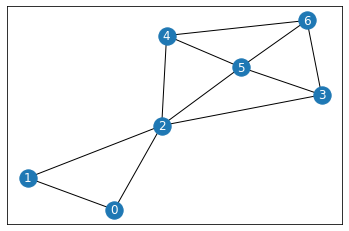

In [7]:
# SOLUTION
import matplotlib.pyplot as plt

# Write your code below
nx.draw_networkx(G, with_labels=True, font_color = 'w')

__(d) 5 points.__
The code in the cell below creates two lists: `nodes_list`, which is a list of all the nodes in $G$, and `edges_list`, which is a list of all the edges in $G$.  

Write code using these lists that prints the edges connected to each of the nodes in $G$. Your output should look like this:

```
The edges connected to node 0 are: [(0, 1), (0, 2)]
The edges connected to node 1 are: [(0, 1), (1, 2)]
The edges connected to node 2 are: [(0, 2), (1, 2), (2, 3), (2, 4), (2, 5)]
The edges connected to node 3 are: [(2, 3), (3, 5), (3, 6)]
The edges connected to node 4 are: [(2, 4), (4, 5), (4, 6)]
The edges connected to node 5 are: [(2, 5), (3, 5), (4, 5), (5, 6)]
The edges connected to node 6 are: [(3, 6), (4, 6), (5, 6)]
```

_Hints._

- This code
    ```python
    my_edge = edges_list[0]
    print(my_edge)
    ```
    will produce `(0, 1)`, the first edge in `edges_list`, as output.  
    
- This code
    ```python
    print(my_edge[0])
    ```
    will produce `0`, one of the nodes of `my_edge[0]`, as output.
    
- This code
    ```python
    print(my_edge[1])
    ```
    will produce `1`, the other node of `my_edge[0]`, as output.

- You can check if an edge `my_edge` is connected to a node `n` if **either** `my_edge[0] == n` **or** `my_edge[1] == n`.

For full credit, your code must use appropriate `for` loop(s), appropriate `if-elif-else` logic, and produce the output above using code (i.e. you can't simply hard code the print statements shown to receive full credit for this part of the question).

In [ ]:
nodes_list = list(G.nodes)
edges_list = list(G.edges)

# Write your code below


In [8]:
# SOLUTION
nodes_list = list(G.nodes)
edges_list = list(G.edges)

# Write your code below
for n in nodes_list:
    my_edge_list = []
    for my_edge in edges_list:
        if my_edge[0] == n or my_edge[1] == n:
            my_edge_list.append(my_edge)
    print(f"The edges connected to node {n} are: {my_edge_list}")
    
# Alternate solution
print('')  # Blank line
for n in nodes_list:
    my_edge_list = []
    for my_edge in edges_list:
        if n in my_edge:
            my_edge_list.append(my_edge)
    print(f"The edges connected to node {n} are: {my_edge_list}")

The edges connected to node 0 are: [(0, 1), (0, 2)]
The edges connected to node 1 are: [(0, 1), (1, 2)]
The edges connected to node 2 are: [(0, 2), (1, 2), (2, 3), (2, 4), (2, 5)]
The edges connected to node 3 are: [(2, 3), (3, 5), (3, 6)]
The edges connected to node 4 are: [(2, 4), (4, 5), (4, 6)]
The edges connected to node 5 are: [(2, 5), (3, 5), (4, 5), (5, 6)]
The edges connected to node 6 are: [(3, 6), (4, 6), (5, 6)]

The edges connected to node 0 are: [(0, 1), (0, 2)]
The edges connected to node 1 are: [(0, 1), (1, 2)]
The edges connected to node 2 are: [(0, 2), (1, 2), (2, 3), (2, 4), (2, 5)]
The edges connected to node 3 are: [(2, 3), (3, 5), (3, 6)]
The edges connected to node 4 are: [(2, 4), (4, 5), (4, 6)]
The edges connected to node 5 are: [(2, 5), (3, 5), (4, 5), (5, 6)]
The edges connected to node 6 are: [(3, 6), (4, 6), (5, 6)]


## Problem 3 (20 points)

The ultimate goal of this question is to produce a side-by-side image containing the two communication flags for Oscar and Romeo, as shown below.

<img src="img/OR_flags.png" alt="Drawing" style="width: 300px;"/>

To get you started, there is code in the cell below that produces 100 x 100 white squares, one for each of the two flags.

Below are some additional instructions and hints to help you answer this question.

- To make the Oscar flag, try using a nested `for` loop.
- To get the yellow color shown in both of the flags, mix the colors red and green together at their full 8 bit intensity of 255.
- The yellow stripes on the Romeo flag should be 7 units wide, and be centered at row 50 and column 50.
- To turn off the plot axes, you can use code like this:
     ``` python
    plt.axis("off")
     ```
- To avoid backend warnings when the flags are displayed, you can use code like this:
    ``` python
    fig.show(warn=False)
    ```
- You will need to use subplots in order to display the two flags side-by-side.
- If you can't figure out how to display the flags side-by-side, simply display them separately for substantial partial credit.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Start with all white 100 x 100 square for Oscar
oscar = 255 * np.ones((100, 100, 3), dtype='uint8')

# Start with all white 100 x 100 square for Romeo
romeo = 255 * np.ones((100, 100, 3), dtype='uint8')

# Write your code below


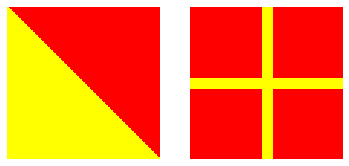

In [9]:
# SOLUTION
import numpy as np
import matplotlib.pyplot as plt

# Start with all white 100 x 100 square for Oscar
oscar = 255 * np.ones((100, 100, 3), dtype='uint8')

# Start with all white 100 x 100 square for Romeo
romeo = 255 * np.ones((100, 100, 3), dtype='uint8')

# Write your code below
# Oscar
# Make entire square yellow
oscar[0:100, 0:100, 2] = 0

# Loop over every pixel
# i = row, j = column
for i in range(100):
    for j in range(100):
        if j > i:
            oscar[i, j, 0] = 255
            oscar[i, j, 1:3] = 0

# Romeo
# Make entire square red
romeo[0:100, 0:100, 1:3] = 0

# Make horizontal yellow stripe
romeo[47:54, 0:100, 1] = 255

# Make vertical yellow stripe
romeo[0:100, 47:54, 1] = 255

# Create figure
fig = plt.figure()

# Put Oscar flag in row 1 column 1 of 1 x 2 plot array
ax = fig.add_subplot(1, 2, 1)
    
# Plot the Oscar flag
plt.imshow(oscar)
plt.axis("off")
    
# Put Romeo flag in row 1 column 2 of 1 x 2 plot array
ax = fig.add_subplot(1, 2, 2)
    
# Plot the romeo flag
plt.imshow(romeo)

# Turn off axes
plt.axis("off")
       
# Display figure
fig.show(warn=False)  # Avoid backend warnings with keyword argument warn=False

## Problem 4 (10 points)

The code in the cell below attempts to loop through all the keys in `my_dictionary` and print the reciprocal of the value associated with each key.  

There are two issues with the code, however.  First, there will be a `ZeroDivisionError` because the value associated with `'KeyZero'` in the dictionary is 0.  Then there will be a `KeyError` because `'Key2'` in the list should actually be `'KeyTwo'`.  

Add an appropriate `try`-`except` block to this code so the output looks like this:

```
I'm sorry, but division by zero is not allowed.
1.00
I'm sorry, but Key2 is not in the dictionary.
0.33
```

In order to receive full credit, you must include **2** different `except` statements and provide specific error handling for the two different types of exceptions that occur.

In [ ]:
my_dictionary = {'KeyZero':0, 'KeyOne':1, 'KeyTwo':2, 'KeyThree':3}
my_keys = ['KeyZero', 'KeyOne', 'Key2', 'KeyThree']

for key in my_keys:
    print(f"{1 / my_dictionary[key]:.2f}")

In [10]:
# SOLUTION
my_dictionary = {'KeyZero':0, 'KeyOne':1, 'KeyTwo':2, 'KeyThree':3}
my_keys = ['KeyZero', 'KeyOne', 'Key2', 'KeyThree']

for key in my_keys:
    try:
        print(f"{1 / my_dictionary[key]:.2f}")
    except ZeroDivisionError:
        print(f"I'm sorry, but division by zero is not allowed.")
    except KeyError:
        print(f"I'm sorry, but {key} is not in the dictionary.")

I'm sorry, but division by zero is not allowed.
1.00
I'm sorry, but Key2 is not in the dictionary.
0.33


## Problem 5 (15 points)

Take a look at the diagram below to refresh your memory about right circular cylinders.

<img src="img/right-circular-cylinder-base-lateral-area.jpg" alt="Drawing" width="400"/>
<br>
<center> Visual depiction of a right circular cylinder (<a href="https://www.mathalino.com/reviewer/solid-mensuration/right-circular-cylinder">source</a>). </center>

 Run the code cell below to import `numpy` as `np`, so it can be used later in this problem.

In [11]:
import numpy as np

__(a) 3 points.__ The `RightCirCyl` class is defined below. When instantiating `RightCirCyl`, it takes one numeric value as input, which is then stored as an attribute `r`, representing the radius of a right circular cylinder.

Modify the code below so that instantiating `RightCirCyl` requires two numeric values as input. The second input value should be used to define a new attribute `h`, representing the height of a right circular cylinder.

In [ ]:
# Modify the code below
class RightCirCyl:    
    def __init__(self, r):
        """ Initialize attributes of a right circular cylinder """
        self.r = r  # Attribute for radius r

In [13]:
# SOLUTION
# Modify the code below
class RightCirCyl:
    def __init__(self, r, h):
        """ Initialize attributes of a right circular cylinder """
        self.r = r  # Attribute for radius r
        self.h = h  # Attribute for height h

__(b) 3 points.__ Replace ONLY the `...` in the code cell below to create an instance of the `RightCirCyl` class with radius 4 and height 10.

In [ ]:
my_cyl = ...

In [14]:
# SOLUTION
my_cyl = RightCirCyl(4, 10)

__(c) 3 points.__ Copy and paste your definition of the `RightCirCyl` class from part (a) in the code cell below.


Add a method called `find_volume` to the `RightCirCyl` class that will:

1. Calculate the volume, using the `r` and `h` attributes defined when the class is instantiated, and 
2. **Store** the value in a new attribute called `volume`.

_Hints._

- See the image above for the formula for the volume of a right circular cylinder.
- You can use `np.pi` to represent the numerical value of $\pi$ in your volume formula.

In [15]:
# SOLUTION
class RightCirCyl:
    def __init__(self, r, h):
        """ Initialize attributes of a right circular cylinder """
        self.r = r  # Attribute for radius r
        self.h = h  # Attribute for height h
    
    def find_volume(self):
        volume = np.pi * (self.r ** 2) * self.h
        self.volume = volume  # Attribute for volume

__(d) 3 points.__ Since you modified the `RightCirCyl` class in part (c), you will need to create the instance `my_cyl` **again**.  To do this, copy and paste your code from part (b) in the code cell below.

After creating the instance `my_cyl` again, write code to call the `find_volume` method for the instance `my_cyl` of the `RightCirCyl` class. 

If you weren't able to answer part (c) correctly, write your answer to this question as if your code for part (c) did work properly.

In [16]:
# SOLUTION
my_cyl = RightCirCyl(4, 10)
my_cyl.find_volume()

__(e) 3 points.__ Using f-strings, print a statement like this:

```
The volume of a right circular cylinder with r=4 and h=10 is 502.65.
```

Your code **must** use `my_cyl` and the attributes `r`, `h`, and `volume` (i.e. not hard-coded numeric values) for full credit. The volume value **must** be printed with 2 decimal places of precision to receive full credit.

In [17]:
# SOLUTION
print(f"The volume of a right circular cylinder with r={my_cyl.r} and h={my_cyl.h} is {my_cyl.volume:.2f}.")

The volume of a right circular cylinder with r=4 and h=10 is 502.65.


---

## When you're finished

* Select **Cell &#8594; Run All**  to run all the cells from top to bottom. Make sure your notebook runs as you expect before submitting it.

* Submit this file using the SM286D Assignment Submission Form linked on the [class website](https://www.usna.edu/Users/math/uhan/sm286d/).